(1.0, 11.5, 9000.0, 31000.0)

Text(0.5, 0, 'Number of Predictors')

Text(0, 0.5, 'Cp')

(1.0, 11.5, 4800.0, 5200.0)

Text(0.5, 0, 'Number of Predictors')

Text(0, 0.5, 'BIC')

(1.0, 11.9, 0.85, 0.965)

Text(0.5, 0, 'Number of Predictors')

Text(0, 0.5, 'Adjusted R^2')

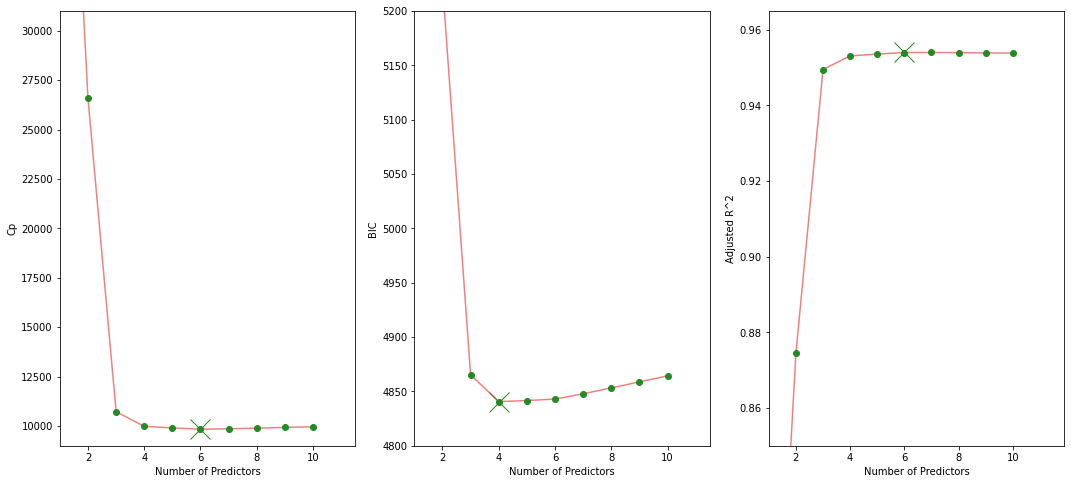

In [54]:
from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn.model_selection import KFold
import random 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import itertools



csv_url = 'http://web.stanford.edu/~oleg2/hse/Credit.csv'
df = pd.read_csv(csv_url)


df['new_gender'] = (df['Gender'] == 'Female').astype(int)
df['new_student'] = (df['Student'] == 'Yes').astype(int)
df['new_married'] = (df['Married'] == 'Yes').astype(int)

ethnicity_to_int = {'Caucasian': 0, 'Asian' : 1, 'African American' : 2}
for row in ['Ethnicity'] :
  df = df.replace({str(row): ethnicity_to_int})


X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Ethnicity', 'new_gender', 'new_student', 'new_married']]

y = df['Balance']


Bics, cps, rsquared = [], [], []

for i in range (1,len(X.columns) + 1):
    
    result_dict = []
    
    for combo in itertools.combinations(X.columns, i):
        
        model = sm.OLS(y, sm.add_constant(X[list(combo)]))
        model = model.fit()
        predicted = model.predict(sm.add_constant(X[list(combo)]))
        RSS = ((predicted - y) ** 2).sum()
        result_dict.append({"model":model, 'RSS': RSS })
        
    df1 = pd.DataFrame(result_dict)

    model_min_rss = df1.loc[df1['RSS'].argmin()]
    best_model = model_min_rss["model"]
    best_RSS = model_min_rss["RSS"]
    
    rsquared.append(best_model.rsquared_adj)
    Bics.append(best_model.bic)
    cps_val = (best_RSS + 2 * i * best_RSS / 400)/ 400
    cps.append(cps_val )

    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 8))


#cp

ax1.axis([1, 11.5, 9000, 31000])

ax1.plot(np.arange(1,len(rsquared) + 1), cps, color = 'lightcoral')
ax1.plot(np.arange(1,len(rsquared) + 1),cps, 'bo', color = 'forestgreen')
ax1.plot(cps.index(min(cps)) + 1,cps[cps.index(min(cps))], "x", ms = 20, color = 'forestgreen')

ax1.set_xlabel('Number of Predictors')
ax1.set_ylabel('Cp')


#Bic

ax2.axis([1, 11.5, 4800, 5200])

ax2.plot(np.arange(1,len(rsquared) + 1), Bics, color = 'lightcoral')
ax2.plot(np.arange(1,len(rsquared) + 1),Bics,'bo', color = 'forestgreen')
ax2.plot(Bics.index(min(Bics)) + 1,Bics[Bics.index(min(Bics))], "x", ms = 20, color = 'forestgreen')

ax2.set_xlabel('Number of Predictors')
ax2.set_ylabel('BIC')


#rsquared

ax3.axis([1, 11.9, 0.85, 0.965])

ax3.plot(np.arange(1,len(rsquared) + 1), rsquared, color = 'lightcoral')
ax3.plot(np.arange(1,len(rsquared) + 1), rsquared,'bo', color = 'forestgreen')
ax3.plot(rsquared.index(max(rsquared)), rsquared[rsquared.index(max(rsquared))], "x", ms = 20, color = 'forestgreen')

ax3.set_xlabel('Number of Predictors')
ax3.set_ylabel('Adjusted R^2')

